# Customer Churn Probability Project (Decision Tree + Random Forest)

In [42]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

### Preprocess the data

In [26]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn-Copy1.csv')

In [27]:
# Replace empty strings with NaN
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data.head()
# Drop rows that contain NaN values (which includes empty strings now)
data.dropna(inplace=True)

data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['MultipleLines'] = LabelEncoder().fit_transform(data['MultipleLines'])
data['InternetService'] = LabelEncoder().fit_transform(data['InternetService'])
data['OnlineSecurity'] = LabelEncoder().fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = LabelEncoder().fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = LabelEncoder().fit_transform(data['DeviceProtection'])
data['TechSupport'] = LabelEncoder().fit_transform(data['TechSupport'])
data['StreamingTV'] = LabelEncoder().fit_transform(data['StreamingTV'])
data['StreamingMovies'] = LabelEncoder().fit_transform(data['StreamingMovies'])
data['Contract'] = LabelEncoder().fit_transform(data['Contract'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = LabelEncoder().fit_transform(data['PaymentMethod'])
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

### Assess the distribution of the target variable to know whether or not we have to use any sampling techniques, synthetic data generation techniques (SMOTE), or class weights adjustment in Random Forest

In [47]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

### Segment the data and separate into train and test set. Set up the targets.

In [28]:
# Define the features and the target
X = data.drop(columns=['Churn', 'customerID'])
y = data['Churn']

# Split into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the feature names and target names
feature_names = list(X.columns)
target_names = ['0','1']

### Set up the Decision Tree Classifier instance. Train on the data and then test on the data.

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86      1033
           1       0.64      0.33      0.44       374

    accuracy                           0.77      1407
   macro avg       0.72      0.63      0.65      1407
weighted avg       0.75      0.77      0.75      1407



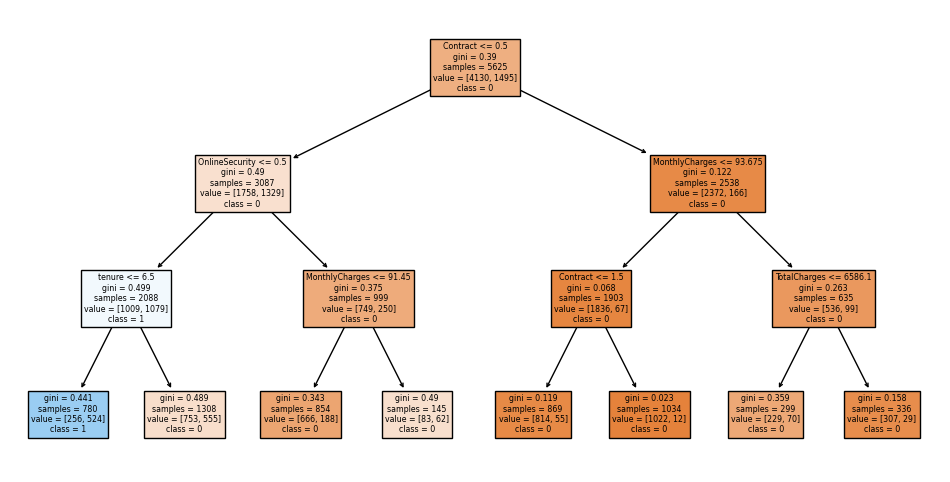

In [29]:
# Initialize and train the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth to prevent overfitting
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()



### Improving the accuracy and robustness of the model through hyperparameter tuning

In [32]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None], # adjusts different depths of tree to account for potential overfitting
    'min_samples_split': [2, 5, 10], # minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4], # minimum samples needed in a leaf mode
    'criterion': ['gini', 'entropy'] # splitting the criteria
}

# Perform the grid search for the most efficient parameters
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Use the best model for predictions
best_tree = grid_search.best_estimator_ # best_estimator_ stores the model
y_pred = best_tree.predict(X_test)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy:  0.7907555555555555


### Implement the Random Forest model and repeat the process for hyperparameter tuning

In [34]:
# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.7867803837953091
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [36]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [None, 10, 20], # Tree depth
    'min_samples_split': [2, 5, 10], # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4] # Minimum samples in each leaf node
}

# Initialize the instance of the GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Random Forest model to the training data
grid_search_rf.fit(X_train, y_train)

# Obtain the best hyperparameters
print("Best hyperparameters for the Random Forest Model: ", grid_search_rf.best_params_)

# Use the best model for the final predictions. best_estimator_ stores the model
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate again with the optimized model
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.798862828713575


### Feature Selection to Improve Accuracy using feature_importances_

In [38]:
# Get the feature importances using the function
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

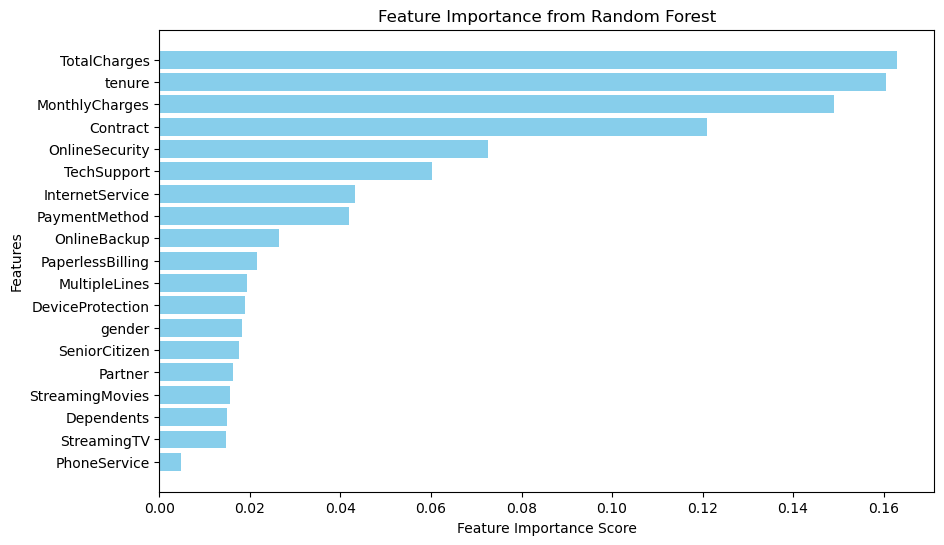

In [40]:
# Visualize the feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis() # Flip order for better visualization
plt.show()

In [43]:
# Set a threshold to pick only the important features
selector = SelectFromModel(best_rf_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Selected feature count: {X_train_selected.shape[1]}")

Original feature count: 19
Selected feature count: 10


/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/anantrajeev/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [44]:
# Retrain the model based on the X_train_selected and X_test_selected
best_rf_model.fit(X_train_selected, y_train)

# Make predictions using the test set with selected features
y_pred_best_rf_selected_features = best_rf_model.predict(X_test_selected)

print("Random Forest Model Accuracy (After Feature Selection):", accuracy_score(y_test, y_pred_best_rf_selected_features))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf_selected_features))

Random Forest Model Accuracy (After Feature Selection): 0.7853589196872779
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



### We can also use Recursive Feature Elimination. For that we would need to determine exactly how many features we want to include. (similar to the threshold capability with feature_importances_)

In [46]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64